# kNN From First Principles

## Lý thuyết

### Tổng quan

- Đây là một thuật toán phi tham số (non-parametric) được sử dụng cho cả bài toán phân loại (classification) và hồi quy (regression). Phi tham số có nghĩa là không cần giả định về phân phối dữ liệu. Do đó, kNN không yêu cầu bất kỳ giả định nền tảng nào.
> Không học công thức, không ước lượng tham số, chỉ so khoảng cách.

- Trong cả bài toán phân loại và hồi quy, đầu vào của thuật toán bao gồm k mẫu huấn luyện gần nhất trong không gian đặc trưng (feature space). Đầu ra phụ thuộc vào việc kNN được dùng cho phân loại hay hồi quy.

1. Trong kNN classification, đầu ra là nhãn lớp. Một điểm dữ liệu được phân loại dựa trên đa số loại của các hàng xóm của nó. Điểm dữ liệu sẽ được gán vào lớp xuất hiện nhiều nhất trong số k hàng xóm gần nhất. Thông thường, k là một số nguyên dương nhỏ. Nếu k = 1, thì điểm dữ liệu đơn giản sẽ được gán vào lớp của hàng xóm gần nhất duy nhất.
> Chọn k (ví dụ k = 5) => Tìm 5 điểm gần nhất

 2. Trong kNN regression, đầu ra đơn giản là một giá trị thuộc tính của đối tượng. Giá trị này là trung bình của các giá trị của k hàng xóm gần nhất.
 > Lấy k hàng xóm gần nhất => Lấy trung bình giá trị của chúng

 - kNN là một dạng học dựa trên mẫu (instance-based learning) hay còn gọi là học lười (lazy learning). Học lười có nghĩa là không cần huấn luyện mô hình từ trước. Toàn bộ dữ liệu huấn luyện sẽ được sử dụng trong giai đoạn kiểm tra (testing). Điều này làm cho quá trình huấn luyện nhanh nhưng quá trình kiểm tra chậm và tốn kém hơn. Vì vậy, giai đoạn testing cần nhiều thời gian và tài nguyên bộ nhớ hơn.
 > kNN không train model, chỉ lưu toàn bộ dữ liệu

### Cách hoạt động

Quy trình kNN THỰC TẾ

Khi quăng 1 điểm mới vào:

B1: Tính 'khoảng cách' từ điểm mới tới TẤT CẢ các điểm train

B2: Sắp xếp các 'khoảng cách' tăng dần

B3: Chọn k điểm có 'khoảng cách' nhỏ nhất

B4: Phân loại => bỏ phiếu. Hồi quy => trung bình


### Cách chọn k

Khi xây dựng mô hình phân loại kNN, một câu hỏi xuất hiện trong đầu là giá trị k (số hàng xóm gần nhất) nên là bao nhiêu để đạt độ chính xác cao nhất. Đây là một câu hỏi rất quan trọng vì độ chính xác của phân loại phụ thuộc vào việc chọn k.

Số lượng hàng xóm (k) trong kNN là một tham số mà   cần chọn tại thời điểm xây dựng mô hình. Việc chọn giá trị k tối ưu trong kNN là vấn đề quan trọng nhất. Giá trị k nhỏ có nghĩa là nhiễu sẽ ảnh hưởng mạnh hơn đến kết quả, do đó xác suất overfitting rất cao. Giá trị k lớn làm cho việc xây dựng mô hình kNN trở nên tốn kém về mặt thời gian tính toán. Ngoài ra, k lớn sẽ tạo ra ranh giới quyết định mượt hơn, điều này đồng nghĩa với variance thấp nhưng bias cao.

Các nhà khoa học dữ liệu thường chọn giá trị k là số lẻ khi số lớp là số chẵn.  có thể áp dụng elbow method để chọn giá trị k. Để tối ưu kết quả, ta có thể sử dụng kỹ thuật Cross Validation. Bằng cách dùng cross-validation,  có thể kiểm tra thuật toán kNN với nhiều giá trị k khác nhau. Mô hình nào cho độ chính xác tốt thì có thể được xem là lựa chọn tối ưu. Việc chọn k phụ thuộc vào từng bài toán cụ thể và đôi khi cách tốt nhất là chạy thử tất cả các giá trị k có thể và đánh giá kết quả.

### Eager learners vs lazy learners

Eager learners là các thuật toán mà khi được cung cấp dữ liệu huấn luyện, chúng sẽ xây dựng một mô hình tổng quát trước khi thực hiện dự đoán cho các điểm dữ liệu mới.

> Học trước - đoán nhanh

Lazy learning có nghĩa là không cần học hay huấn luyện mô hình trước, và toàn bộ dữ liệu sẽ được sử dụng tại thời điểm dự đoán. Lazy learners chờ đến phút cuối cùng trước khi phân loại bất kỳ điểm dữ liệu nào. Chúng chỉ đơn giản là lưu trữ tập dữ liệu huấn luyện và chờ đến khi cần phân loại. Lazy learners còn được gọi là instance-based learners vì chúng lưu trữ các điểm dữ liệu huấn luyện (instances) và mọi việc học đều dựa trên các instance này.

> Không học - lưu dữ liệu - đoán lúc cần

---

## Thực hành

Dự đoán lành tính hay ác tính Dataset liên quan đến tế bào ung thư

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
data = 'breast-cancer-wisconsin.data.txt'
df = pd.read_csv(data, header=None)

### EDA

In [160]:
df.shape

(699, 11)

In [161]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Đổi tên cột

In [162]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [163]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Xóa cột

Ở đât cột id không đóng góp gì trong dự đoán nên xóa

In [164]:
df.drop('Id', axis=1, inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


#### Xem tần suất xuất hiện của các đặc trưng

In [166]:
# for var in df.columns:
#     print(df[var].value_counts())

#### Chuyển đổi kiểu dữ liệu cột `Bare_Nuclei`

`Bare_Nuclei` thuộc loại số nguyên. Nhưng tóm tắt của khung dữ liệu cho thấy đó là đối tượng kiểu. Vì vậy, tôi sẽ chuyển đổi rõ ràng kiểu dữ liệu của nó thành số nguyên.

In [167]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [168]:
df.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,float64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


Tổng kết:

Có 10 biến số (numerical variables) trong bộ dữ liệu.

Tất cả các biến đều thuộc kiểu rời rạc (discrete type).

Trong tổng số 10 biến, 9 biến đầu là biến đặc trưng (feature variables) và biến cuối cùng là Class là biến mục tiêu (target variable)

#### Kiểm tra dữ liệu thiếu

In [169]:
df.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,16
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


16 giá trị thiếu ở cột `Bare_Nuclei`

##### Cột `Bare_Nuclei`

In [170]:
df['Bare_Nuclei'].value_counts()

,count
Bare_Nuclei,
1.0,402
10.0,132
2.0,30
5.0,30
3.0,28
8.0,21
4.0,19
9.0,9
7.0,8


In [171]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [172]:
df['Bare_Nuclei'].isna().sum()

np.int64(16)

#### Cột `Class`

In [173]:
df['Class'].value_counts()

,count
Class,
2,458
4,241


In [174]:
df['Class'].value_counts()/(len(df))

,count
Class,
2,0.655222
4,0.344778


`2`: lành tính

`4`: ác tính

> có vẽ nhiều dữ liệu lành tính hơn

#### Ngoại lai

In [175]:
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

> Thật ra kNN có thể làm việc tốt kể cả có ngoại lai.

### Trực quan hóa dữ liệu

#### Hist

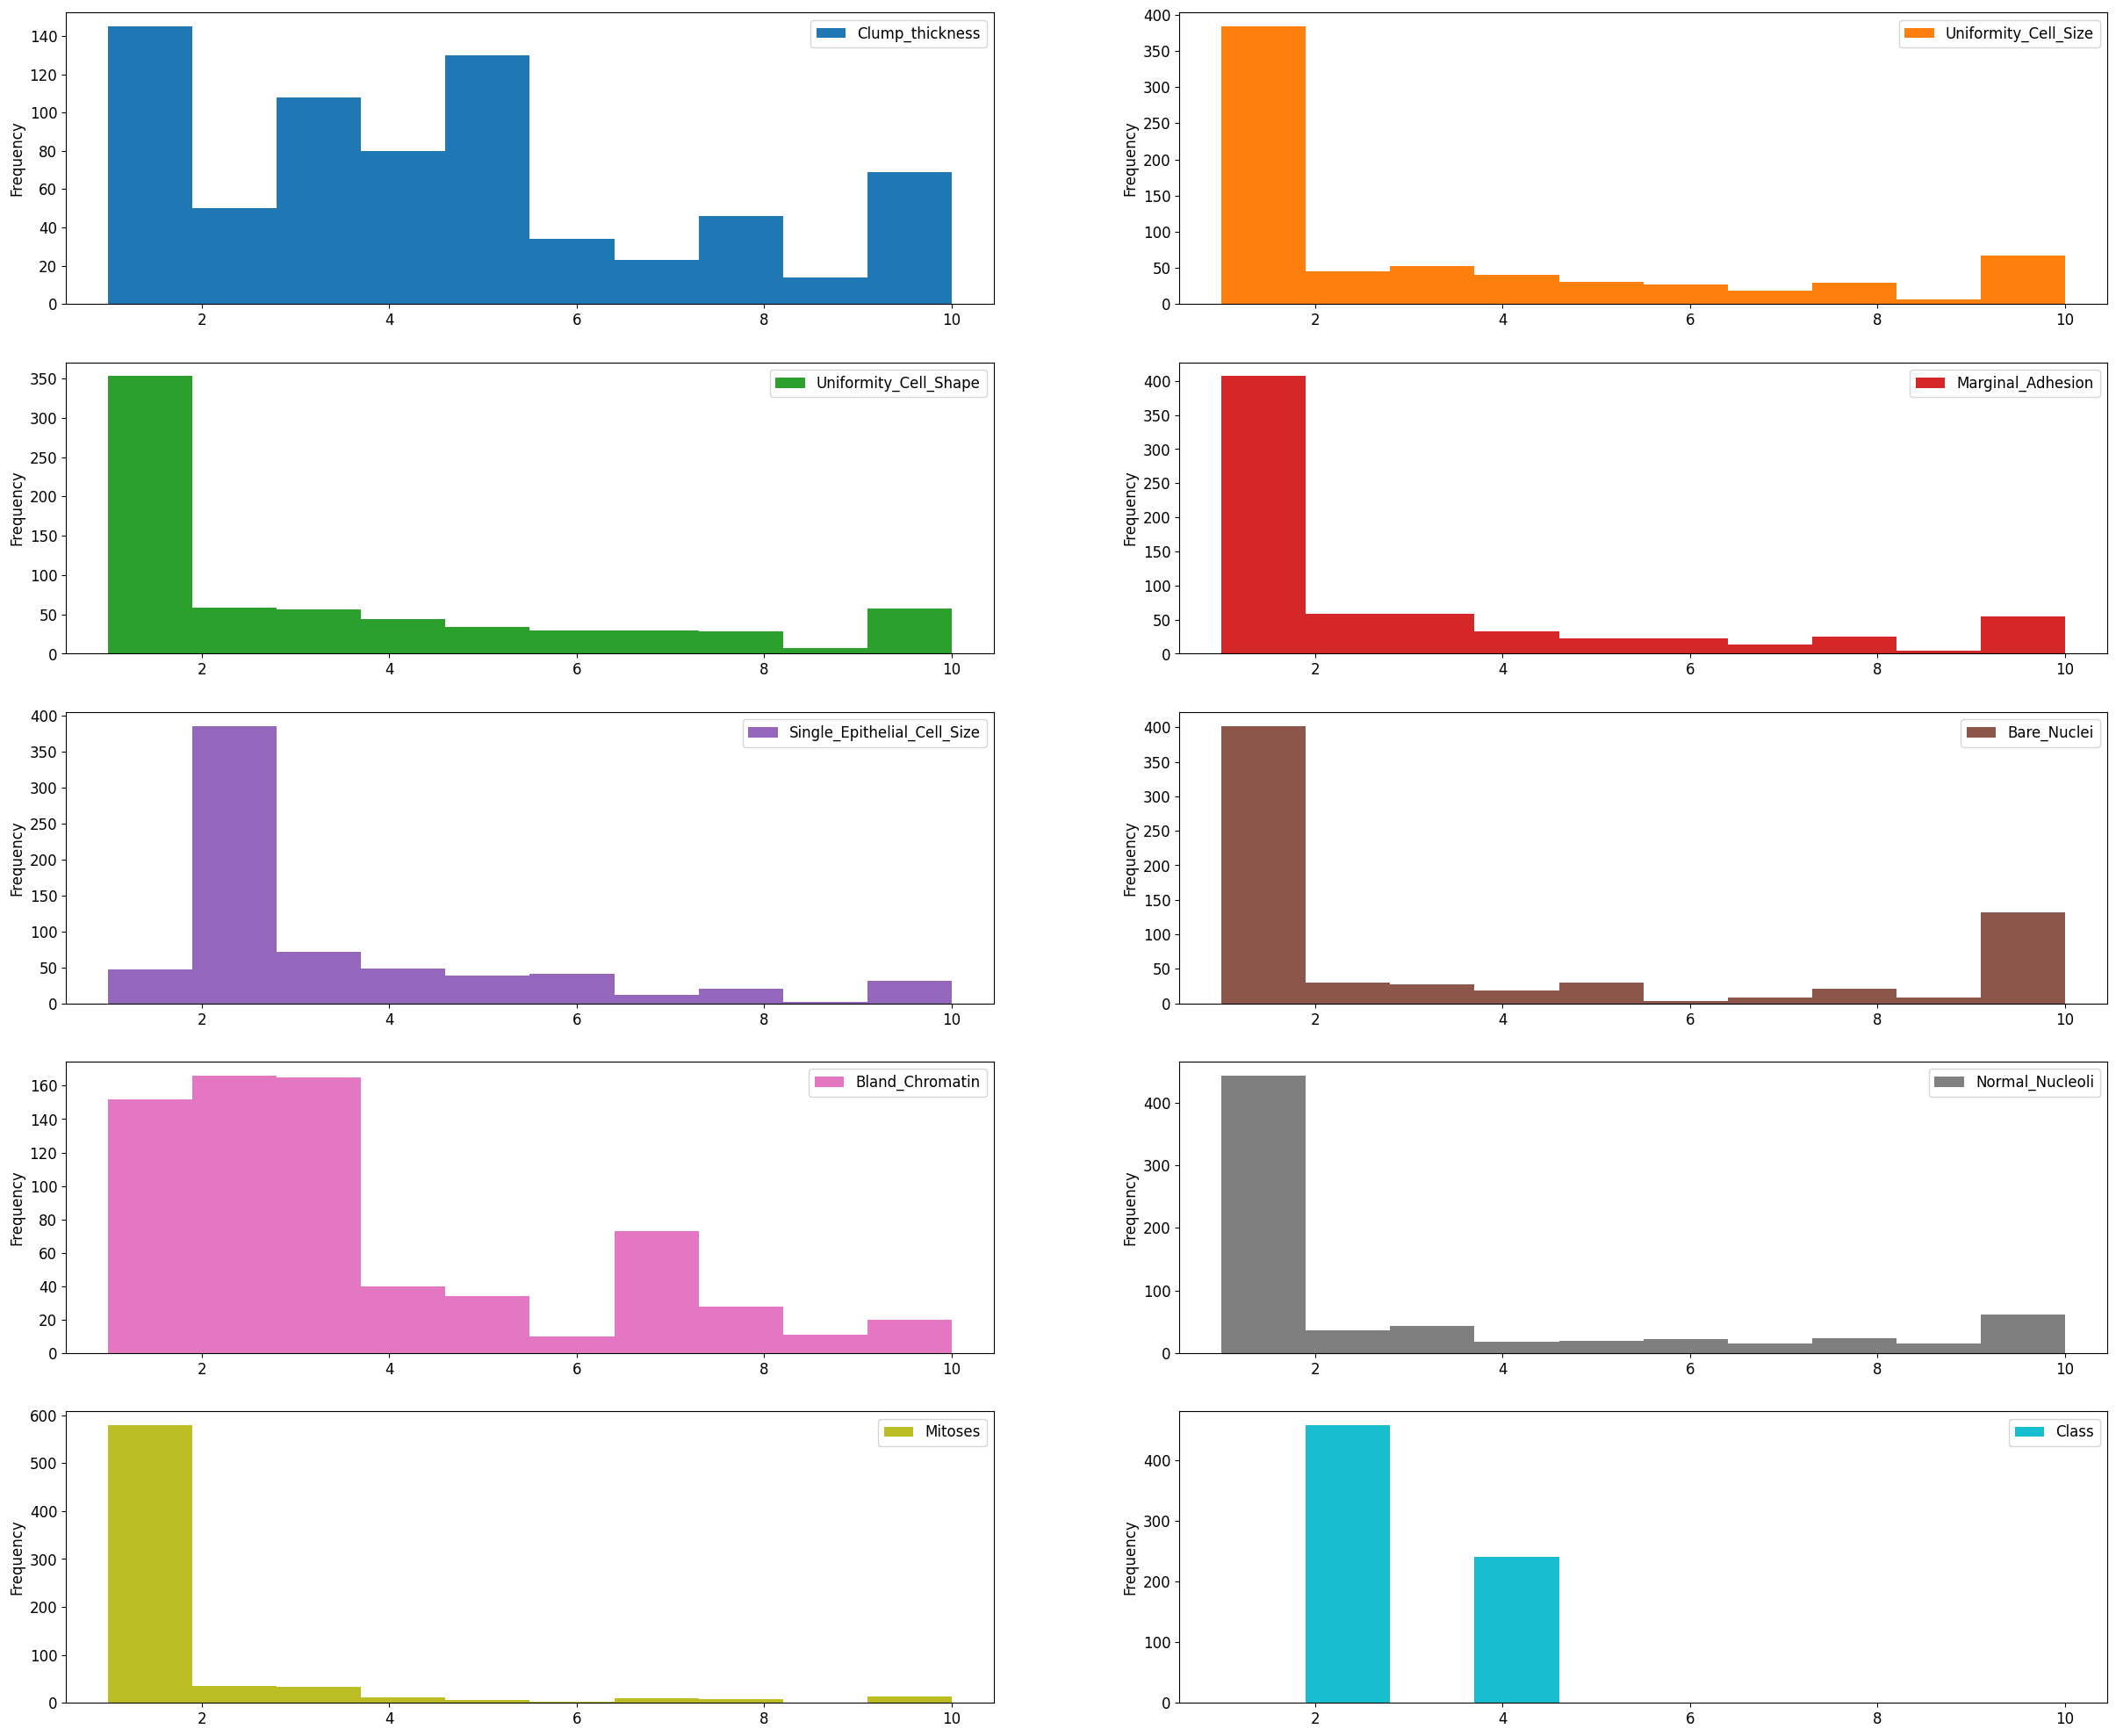

In [176]:
plt.rcParams['figure.figsize']=(30,25)
df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

> Phần lớn là lệch dương

#### HeatMap

In [177]:
df.corr()['Class'].sort_values(ascending=False)

,Class
Class,1.000000
Bare_Nuclei,0.822696
Uniformity_Cell_Shape,0.818934
Uniformity_Cell_Size,0.817904
Bland_Chromatin,0.756616
Clump_thickness,0.716001
Normal_Nucleoli,0.712244
Marginal_Adhesion,0.696800
Single_Epithelial_Cell_Size,0.682785
Mitoses,0.423170


> Tương quan dương mạnh giữa `Class` và `Bare_Nuclei`, `Class` và `Uniformity_Cell_Shape`, `Class` và `Uniformity_Cell_Size`.

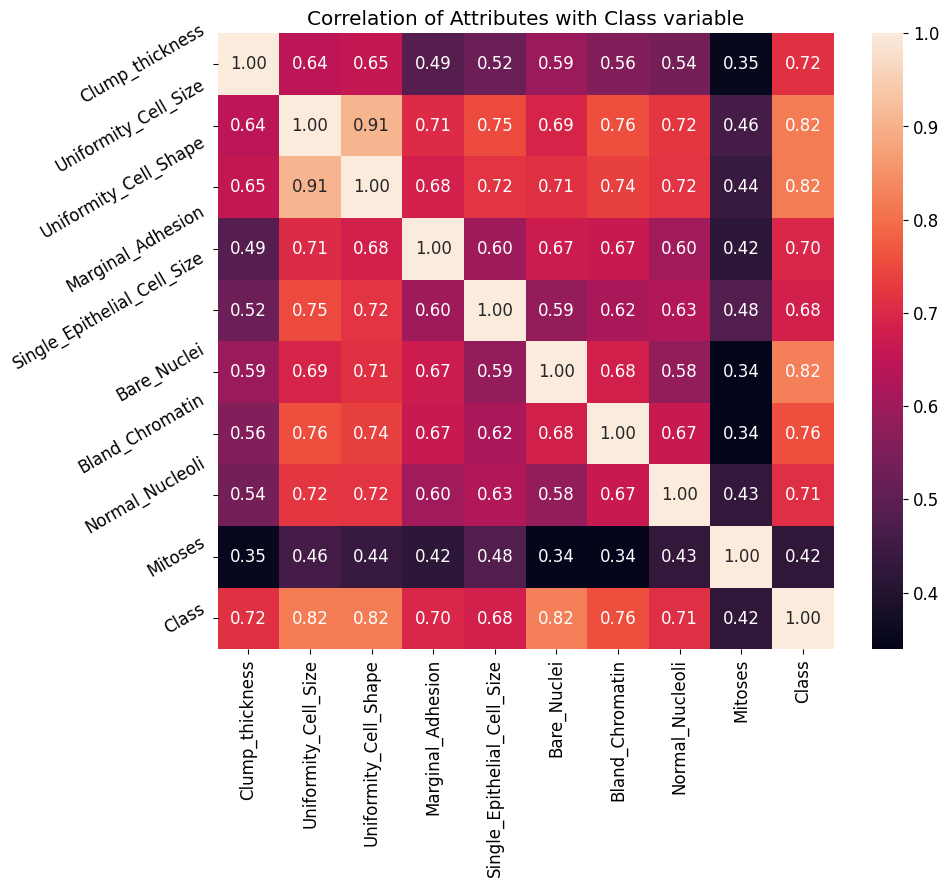

In [178]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Từ heatmap tương quan ở trên,  có thể kết luận rằng:

`Class` có tương quan dương rất mạnh với `Uniformity_Cell_Size`, `Uniformity_Cell_Shape` và `Bare_Nuclei` (hệ số tương quan = 0.82).

`Class` có tương quan dương với `Clump_thickness` (hệ số tương quan = 0.72), Marginal_Adhesion (hệ số tương quan = 0.70), `Single_Epithelial_Cell_Size` (hệ số tương quan = 0.68) và `Normal_Nucleoli` (hệ số tương quan = 0.71).

`Class` có tương quan dương yếu với `Mitoses` (hệ số tương quan = 0.42).

Biến Mitoses có tương quan dương yếu với tất cả các biến còn lại (hệ số tương quan < 0.50).

### Chia dữ liệu

In [179]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [181]:
X_train.shape, X_test.shape

((559, 9), (140, 9))

### Trích lọc đặc trưng

In [182]:
X_train.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,float64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64


#### Xử lý dữ liệu thiếu

In [183]:
X_train.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,13
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [184]:
X_test.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,3
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


Có hai phương pháp có thể được sử dụng để điền giá trị thiếu.

- Phương pháp thứ nhất là điền bằng giá trị trung bình hoặc trung vị.

- Phương pháp thứ hai là điền bằng cách lấy mẫu ngẫu nhiên.

Khi trong tập dữ liệu có các giá trị ngoại lai (outliers), thì nên sử dụng phương pháp điền bằng trung vị.

In [185]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train[['Bare_Nuclei']] = imputer.fit_transform(X_train[['Bare_Nuclei']])
X_test[['Bare_Nuclei']] = imputer.transform(X_test[['Bare_Nuclei']])

In [186]:
X_train.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [187]:
X_test.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [188]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [189]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4


### Chuẩn hóa

In [190]:
cols = X_train.columns

In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [192]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [193]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [194]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


### Huấn luyện

In [195]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Dự đoán

In [196]:
y_pred = knn.predict(X_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

In [197]:
knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [198]:
knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

### Các thông số

In [199]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


#### So sánh train-set và test-set

In [200]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9714


> không bị overfitting

#### So sánh độ chính xác của mô hình với null accuracy

In [201]:
y_test.value_counts()

,count
Class,
2,85
4,55


In [202]:
null_accuracy = (85/(85+55))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


> điểm chính xác mô hình là 0,9714 nhưng điểm chính xác rỗng là 0,6071. Vì vậy, có thể kết luận rằng mô hình K Nearest Neighbors đang làm rất tốt trong việc dự đoán các nhãn lớp.

### Thử k khác

k = 5

In [203]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

y_pred_5 = knn_5.predict(X_test)
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


k = 6

In [204]:
knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, y_train)

y_pred_6 = knn_6.predict(X_test)
print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9786


k = 7

In [205]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)

y_pred_7 = knn_7.predict(X_test)
print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9786


k = 8

In [206]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train, y_train)

y_pred_8 = knn_8.predict(X_test)
print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9786


k = 9

In [207]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, y_train)

y_pred_9 = knn_9.predict(X_test)
print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9714


Độ chính xác (accuracy) của mô hình ban đầu với k = 3 là 0.9714. Bây giờ, có thể thấy rằng với k = 5 thì độ chính xác vẫn giữ nguyên là 0.9714. Nhưng nếu tiếp tục tăng giá trị của k thì độ chính xác sẽ được cải thiện.

Với k = 6, 7, 8 thu được độ chính xác là 0.9786. Điều này cho thấy hiệu năng của mô hình được cải thiện.

Nếu tăng k lên 9 thì độ chính xác lại giảm xuống còn 0.9714.

Dựa trên phân tích ở trên,có thể kết luận rằng độ chính xác của mô hình phân loại là rất tốt. Mô hình đang làm rất tốt trong việc dự đoán nhãn lớp.

Tuy nhiên, accuracy không cho  biết phân phối giá trị bên trong dữ liệu. Ngoài ra, nó cũng không nói cho ta biết mô hình đang mắc loại lỗi nào.

 có một công cụ khác gọi là Confusion Matrix để giải quyết vấn đề này.

### Ma trận nhầm lẫn

In [208]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


In [209]:
cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)
print('\nTrue Positives(TP) = ', cm_7[0,0])
print('\nTrue Negatives(TN) = ', cm_7[1,1])
print('\nFalse Positives(FP) = ', cm_7[0,1])
print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[83  2]
 [ 1 54]]

True Positives(TP) =  83

True Negatives(TN) =  54

False Positives(FP) =  2

False Negatives(FN) =  1


> k = 7 cho ra kết quả tốt hơn

<Axes: >

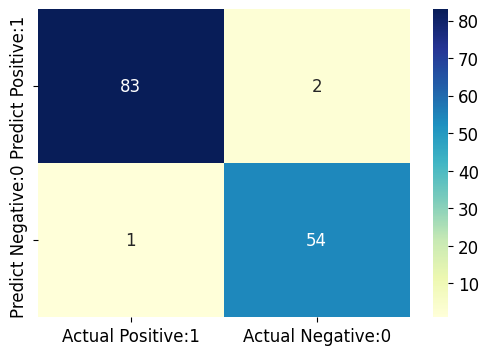

In [210]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Các chỉ số phân loại

In [211]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [212]:
# TP = cm_7[0,0]
# FP = cm_7[0,1]
# FN = cm_7[1,0]
# TN = cm_7[1,1]

In [213]:
# classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
# print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

In [214]:
# precision = TP / float(TP + FP)
# print('Precision : {0:0.4f}'.format(precision))

In [215]:
# # adjust figure size
# plt.figure(figsize=(6,4))
# # adjust the font size
# plt.rcParams['font.size'] = 12
# # plot histogram with 10 bins
# plt.hist(y_pred_1, bins = 10)
# # set the title of predicted probabilities
# plt.title('Histogram of predicted probabilities of malignant cancer')
# # set the x-axis limit
# plt.xlim(0,1)
# plt.xlabel('Predicted probabilities of malignant cancer')
# plt.ylabel('Frequency')

### ROC-AUC


In [216]:
y_pred_1 = knn.predict_proba(X_test)[:, 1]

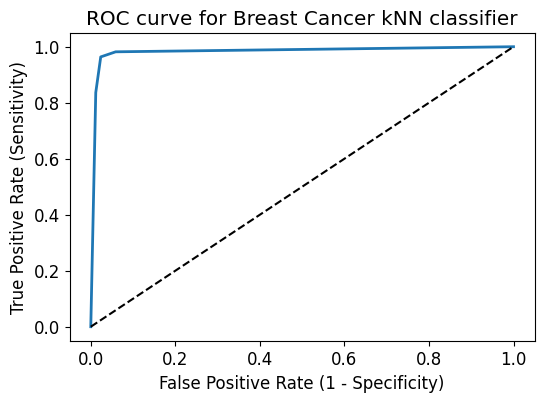

In [217]:
y_pred_1 = knn.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Breast Cancer kNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [218]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9825


In [219]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9910


> AUC ROC được xác thực chéo của chúng tôi rất gần với 1. Vì vậy, có thể kết luận rằng đây là một mô hình rất tốt.

### k-fold Cross Validation

In [220]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.875      0.96428571 0.94642857 0.98214286 0.96428571 0.96428571
 0.98214286 0.98214286 1.         0.98181818]


In [221]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9643


> Sử dụng giá trị trung bình của cross-validation,có thể kết luận rằng độ chính xác kỳ vọng của mô hình vào khoảng 96.46%.

Nếu   xem xét toàn bộ 10 giá trị accuracy được tạo ra bởi 10-fold cross-validation, ta cũng có thể kết luận rằng độ biến thiên (variance) của accuracy giữa các fold là tương đối cao, dao động từ 100% accuracy đến 87.72% accuracy. Vì vậy, có thể kết luận rằng mô hình phụ thuộc khá nhiều vào cách các fold được sử dụng để huấn luyện, nhưng điều này cũng có thể là hệ quả của kích thước dataset nhỏ.

---

## Kết luận

Trong dự án này, mình xây dựng một mô hình phân loại kNN để phân loại các bệnh nhân mắc ung thư vú. Mô hình cho thấy hiệu năng rất tốt, được thể hiện qua độ chính xác của mô hình đạt 0.9786 với k = 7.

Với k = 3, độ chính xác trên tập huấn luyện là 0.9821, trong khi độ chính xác trên tập kiểm tra là 0.9714. Hai giá trị này khá tương đồng, do đó không có dấu hiệu của hiện tượng overfitting.

So sánh độ chính xác của mô hình (0.9714) với độ chính xác ngẫu nhiên (null accuracy) là 0.6071. Vì vậy, có thể kết luận rằng mô hình K Nearest Neighbors đang thực hiện rất tốt việc dự đoán nhãn lớp.

Độ chính xác ban đầu của mô hình với k = 3 là 0.9714. Tiếp theo, ta có thể thấy rằng với k = 5, mô hình vẫn đạt cùng mức độ chính xác 0.9714. Tuy nhiên, khi tiếp tục tăng giá trị của k, độ chính xác của mô hình được cải thiện. Cụ thể, với k = 6, 7, 8, độ chính xác đạt 0.9786, cho thấy sự cải thiện về hiệu năng. Nếu tăng k lên 9, độ chính xác lại giảm xuống 0.9714. Do đó, có thể kết luận rằng giá trị k tối ưu là 7.

Mô hình phân loại kNN với k = 7 cho thấy các dự đoán chính xác hơn và số lượng lỗi ít hơn so với mô hình k = 3. Vì vậy,  đã đạt được sự cải thiện hiệu năng với k = 7.

ROC AUC của mô hình tiến rất gần đến 1, do đó  có thể kết luận rằng bộ phân loại này thực hiện tốt việc dự đoán ung thư là lành tính (benign) hay ác tính (malignant).

Sử dụng giá trị trung bình của cross-validation,  có thể kết luận rằng độ chính xác kỳ vọng của mô hình vào khoảng 96.46%.

Nếu xem xét toàn bộ 10 giá trị accuracy được tạo ra bởi 10-fold cross-validation,  cũng có thể kết luận rằng độ biến thiên của accuracy giữa các fold là tương đối cao, dao động từ 100% accuracy đến 87.72% accuracy. Do đó, có thể kết luận rằng mô hình phụ thuộc khá nhiều vào cách các fold được sử dụng để huấn luyện, nhưng điều này cũng có thể là hệ quả của kích thước dataset nhỏ.

---

---

----